# DSAI 2201 Winter 2024 Assignment

In [1]:
NAME = "Djihane Mahraz 60300310"

COLLABORATORS = "shaza saad 60301815"

## Assignment 1 - Data Analysis
**(20 points in total)**

In Assignments part 1 & part 2 we will go through the entire journey of a small data science project.

More details about the dataset can be found in the Kaggle website in the following links: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

But a modified version of the dataset was attached in the dropbox, please use it to answer this assignment
     



**Question 1.**  _(2 points)_
* A) Analyze the distribution of death events cases among the patients and the race. calculate their respective numbers and percentages.  _(0.5 points)_
* B) Compute descriptive statistics of the data. Comment on the results.  _(0.75 points)_
* C) Analyze the skew and the kurtosis of medical variables distributions(Numbers & Graphs). Comment on the results.  _(0.75  points)_

**Question 2.**  _(2 points)_
* Use univariate plots  to analyze patterns in each of the medical variables with respect to the outcome (death status). What categories of patients( race and marital status) were most likely to die from breast cancer? . (2 points)


**Question 3.**  _(2 points)_
* Use multivariate plots to:
   * A) Analyze the relationship between medical variables. Comment on the results  _(1 points)_
   * B) Identify potential factors that can predict Death event in married patients. Comment on the results.  _(1 points)_

**Question 4.**  _(3 points)_
* Identify and remove any outliers in the medical variables. Explain the rationale for identifying and removing outliers.  _(3 points)_

**Question 5.**  _(3 points)_
* How did you treat missing values for the attributes that you included in the analysis ? Provide a detailed explanation in the comments._(3 points)_

**Question 6.**  _(3 points)_
* The dataset contains  contains alot of zeros, identify which attributes cannot be 0 medically speaking, and impute them, while explaining the rational behind it._(3 points)_


**Question 7.**  _(2 points)_
* Identify the attibutes that will need rescalling ( with explanation ), apply one of the rescalling techniques we have seen in our course and explain your rational. _(2 points)_

**Question 8.**  _(3 points)_
* Through an extensive research, provide additional attributes that you can create that will enhance your dataset, explain the logic behind it, and add them to your data, _(1.5 points)_
* identify the most irrelevant attribute(s), and exclude them from your project for the next steps  _(1.5 points)_


## Q1:

Solution:



In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file
df = pd.read_csv("Breast_Cancer-Winter2024.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60.0,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62.0,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75.0,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,NaN,Alive
4,47,White,Married,T2,N1,IIB,NaN,3,Regional,41.0,Positive,Positive,3,1,NaN,Alive


In [3]:
df.dtypes

Age                         int64
Race                       object
Marital Status             object
T Stage                    object
N Stage                    object
6th Stage                  object
differentiate              object
Grade                      object
A Stage                    object
Tumor Size                float64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined      int64
Reginol Node Positive       int64
Survival Months           float64
Status                     object
dtype: object

In [361]:
# compute the number of deaths for each race using value counts (a series)
death_by_race = df[df['Status'] == 'Dead']['Race'].value_counts()
# divide by the number of races and * 100 to get the percentage
death_percentage = round((death_by_race / df['Race'].value_counts()) * 100, 2)
print("The number of deaths by race is:\n"+str(death_by_race)+"\n------")
print("The percentage of death by race is:\n"+str(death_percentage))

The number of deaths by race is:
Race
White    510
Black     73
Other     33
Name: count, dtype: int64
------
The percentage of death by race is:
Race
Black    25.09
Other    10.31
White    14.94
Name: count, dtype: float64


In [362]:
# display descriptive statistics
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4018.000000,4024.000000,4024.000000,4017.000000
mean,53.972167,30.422101,14.357107,4.158052,71.173762
std,8.963134,21.154352,8.099675,5.109331,23.089655
min,30.000000,0.000000,1.000000,1.000000,0.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


**age** 

the median and mean are almost equal so we can assume that the age follows a normal distribution 

iqr of age = 61 - 47 = 14 

upper bound = 61 + 1.5*14 = 82 --> no upper outliers 

lower bound = 47 - 1.5*14 = 26 --> no lower outliers

**tumor size**

mean > median --> positive/right skew 

iqr = 38 - 16 = 22 

upper = 38 + 1.5*22 = 71 --> upper outliers 

lower = 16 - 1.5*22 = -17 --> no lower outliers

**regional node examined**

mean > median --> positive/right skew

iqr = 19 - 9 = 10 

upper = 19 + 1.5*10 = 34 --> upper outliers 

lower = 9 - 15 = -6 --> no lower outliers

**regional node positive**

mean > median --> right/positive skewed

iqr = 5 - 1 = 4 

upper = 5 + 1.5*4 = 11 --> upper ourliers 

lower = 1 - 1.5*4 = -5 --> no lower outliers

**survival months** 

mean < median --> left/negative skewed

iqr = 90 - 56 = 34 

upper = 90 + 1.5*34 = 141 --> no upper outliers 

lower = 56 - 1.5*34 = 5 --> some lower outliers


In [363]:
# seperate the numerical values
numerical_values = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
# calculate skeweness and kurtosis of the numercial values
kurtosis = df[numerical_values].kurtosis()
skewness = df[numerical_values].skew()

print(f'Kurtosis \n{kurtosis} \n-------\nSkewness \n{skewness}')

Kurtosis 
Age                      -0.755088
Tumor Size                3.622895
Regional Node Examined    1.649322
Reginol Node Positive     8.981266
Survival Months           0.070571
dtype: float64 
-------
Skewness 
Age                      -0.220373
Tumor Size                1.736065
Regional Node Examined    0.829274
Reginol Node Positive     2.702536
Survival Months          -0.611098
dtype: float64


**age**

kurtosis close to 0 so the distribution is more normal

skeweness is negative but between -0.5 and 0 so we can assume its symetrical / normal

**tumor size** 

kurtosis > 2 so its highly peaked 

skeweness > 1 so its highly positively skewed --> higher smaller numbers and mean > meadian > mode

**regional node examined** 

kurtosis between 1 and 2 so its peaked

skeweness is between 0.5 and 1 so positively skewed --> higher smaller numbers and mean > meadian > mode

**regional node positive**

kurtosis > 2 so its highly peaked

skeweness > 1 so its highly positively skewed --> higher smaller numbers and mean > meadian > mode

**survival months**

kurtosis close to 0 so the distrivution is more normal

skeweness between -1 and -0.5 so its negatively skewed and mean < median < mode

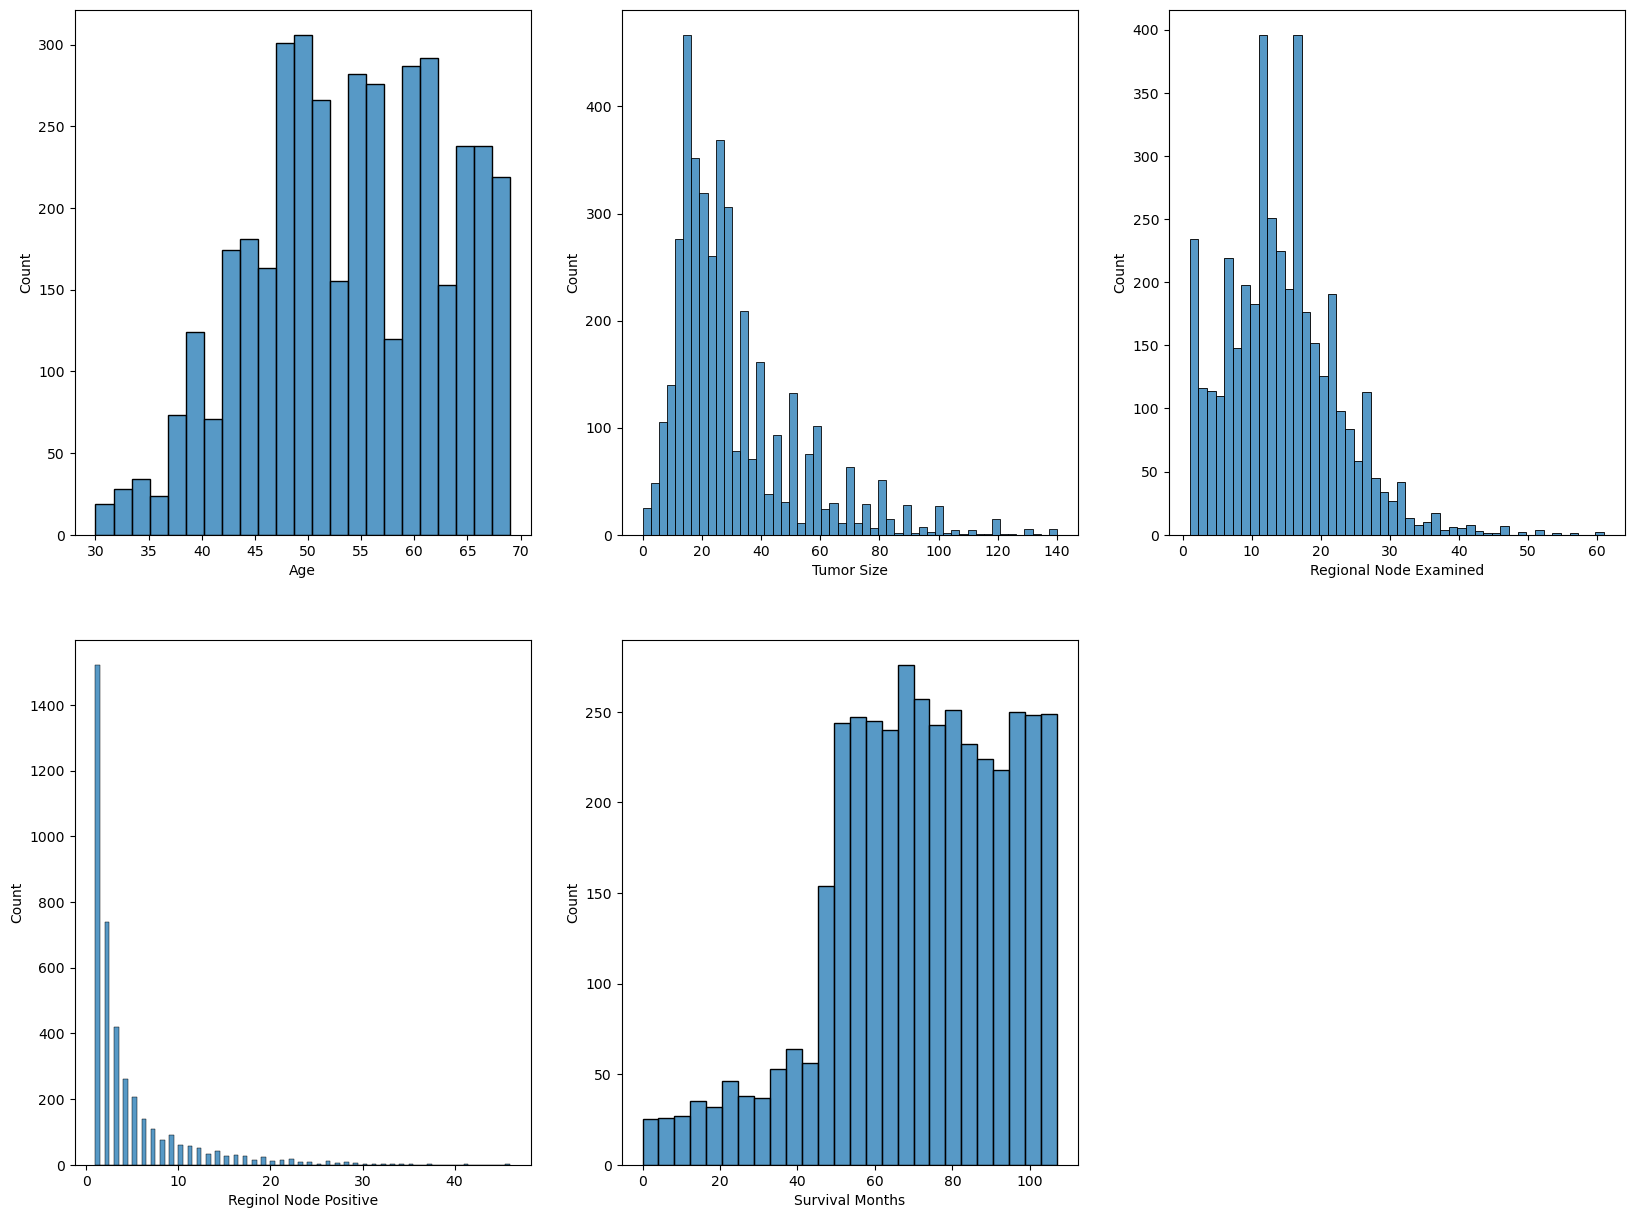

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

# display the variables in a histogram to visualize the skeweness and kurtosis

plt.figure(figsize=(20, 15))

for i in range(len(numerical_values)):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=numerical_values[i], bins = 'auto')


plt.show()

###  Q2:
Solution:

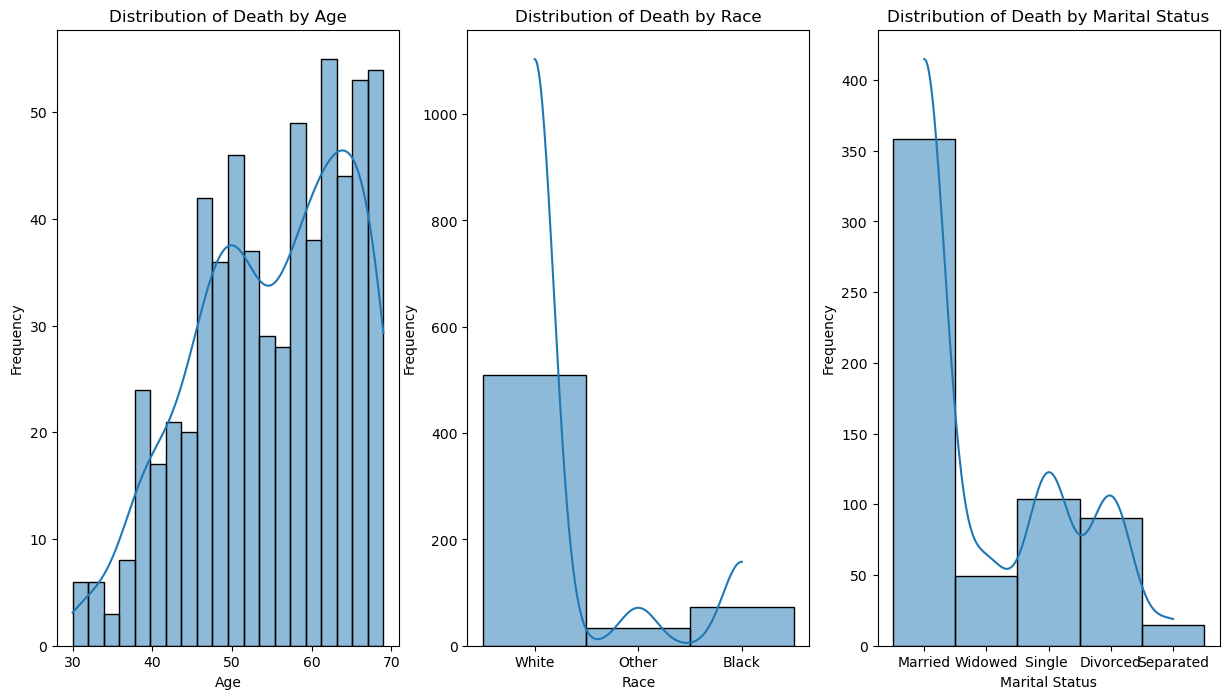

In [326]:
# Filter the DataFrame to include only patients who have died
plt.figure(figsize = (15, 8))
dead_patients = df[df['Status'] == 'Dead']

# Create a histogram to display the distribution of death by age
plt.subplot(1,3,1)
sns.histplot(data = dead_patients, x = 'Age', bins = 20, kde = True)
plt.title('Distribution of Death by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# by race
plt.subplot(1,3,2)
sns.histplot(data = dead_patients, x = 'Race', bins = 20, kde = True)
plt.title('Distribution of Death by Race')
plt.xlabel('Race')
plt.ylabel('Frequency')

# by marital status
plt.subplot(1,3,3)
sns.histplot(data = dead_patients, x = 'Marital Status', bins = 20, kde = True)
plt.title('Distribution of Death by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

plt.show()

 according to the graphs, white and married individuals are most likeky to die from breast cancer

###  Q3:

In [405]:
# replace non-numerical values in grade column
df['Grade'] = df['Grade'].replace(' anaplastic; Grade IV', 4)
df['Grade'].value_counts()

Grade
2    2342
3    1108
1     541
4      19
Name: count, dtype: int64

In [365]:
# check the shape
df.shape

(4024, 16)

In [366]:
# check for missing values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   5
N Stage                   0
6th Stage                 0
differentiate             6
Grade                     0
A Stage                   0
Tumor Size                6
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           7
Status                    0
dtype: int64

In [408]:
# drop rows containing missing values
df = df.dropna()
df.shape
# 14 rows were dropped

(4010, 16)

C:\Users\jmahr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

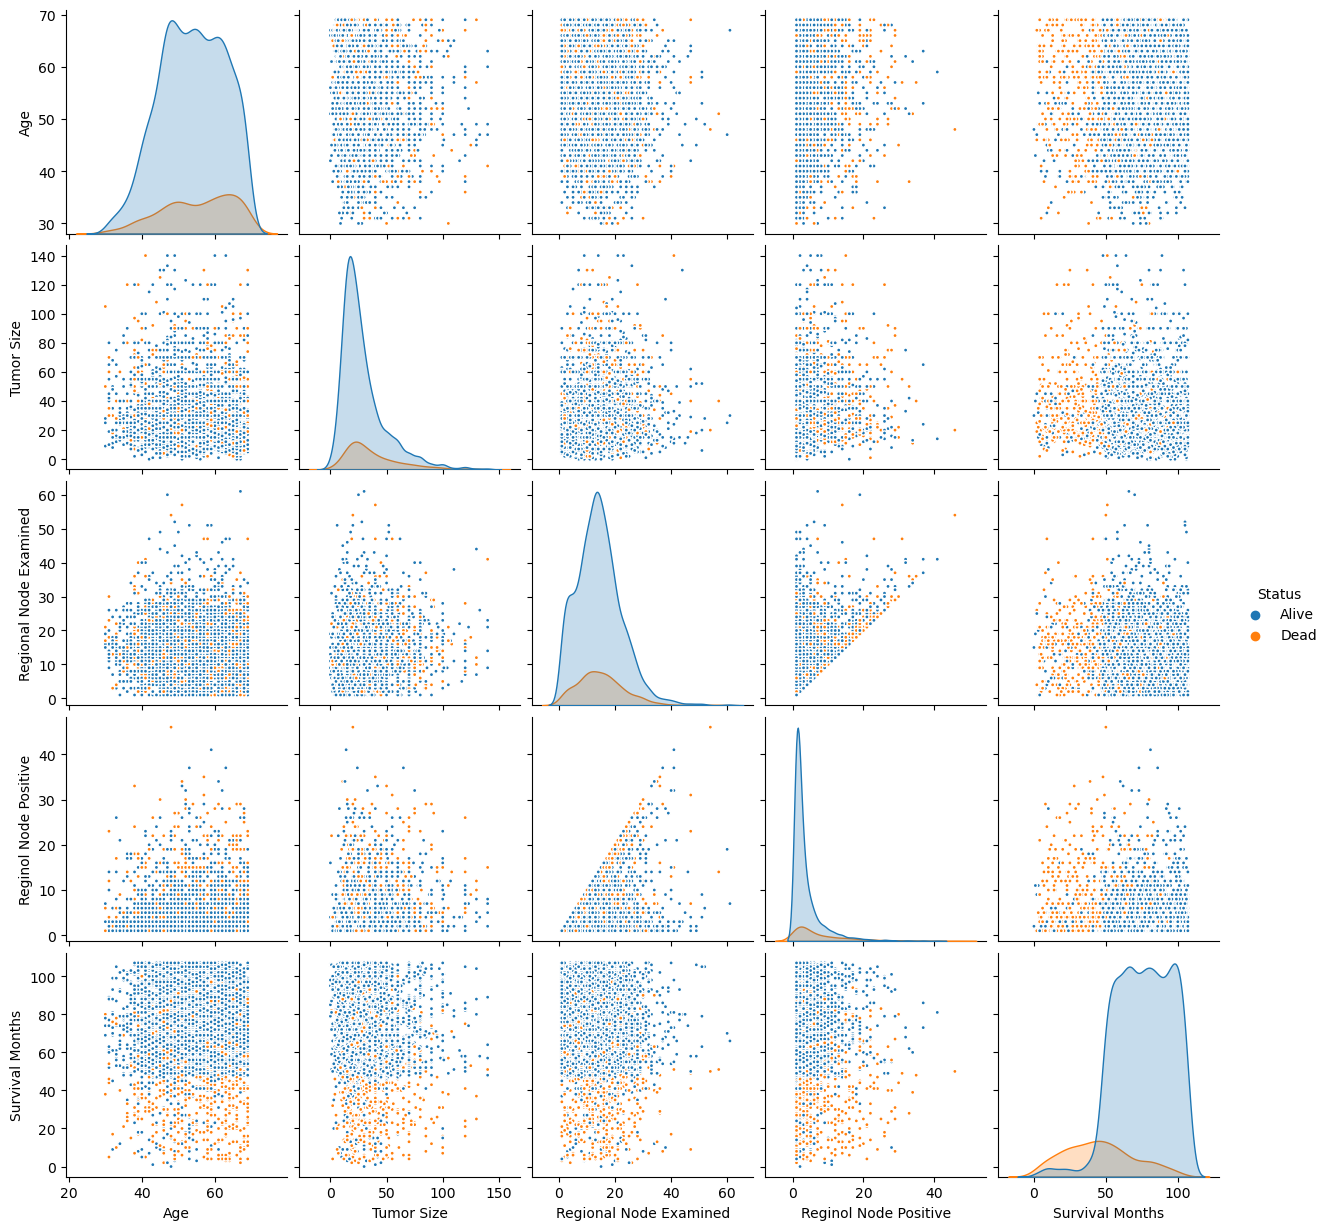

In [251]:
# analyze the relationship between variables using a pairplot
plt.figure(figsize = (15,10))
sns.pairplot(data = df, hue = 'Status', plot_kws=dict(marker=".", linewidth=1))
plt.show()

# 0: alive 
# 1: dead

In [409]:
# encode status column to use a heatmap
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# create a copy of the dataset
df_copy = df.copy()
df_copy['Status'] = label_encoder.fit_transform(df_copy['Status'])

In [370]:
# add status
new_column = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Grade', 'Status']

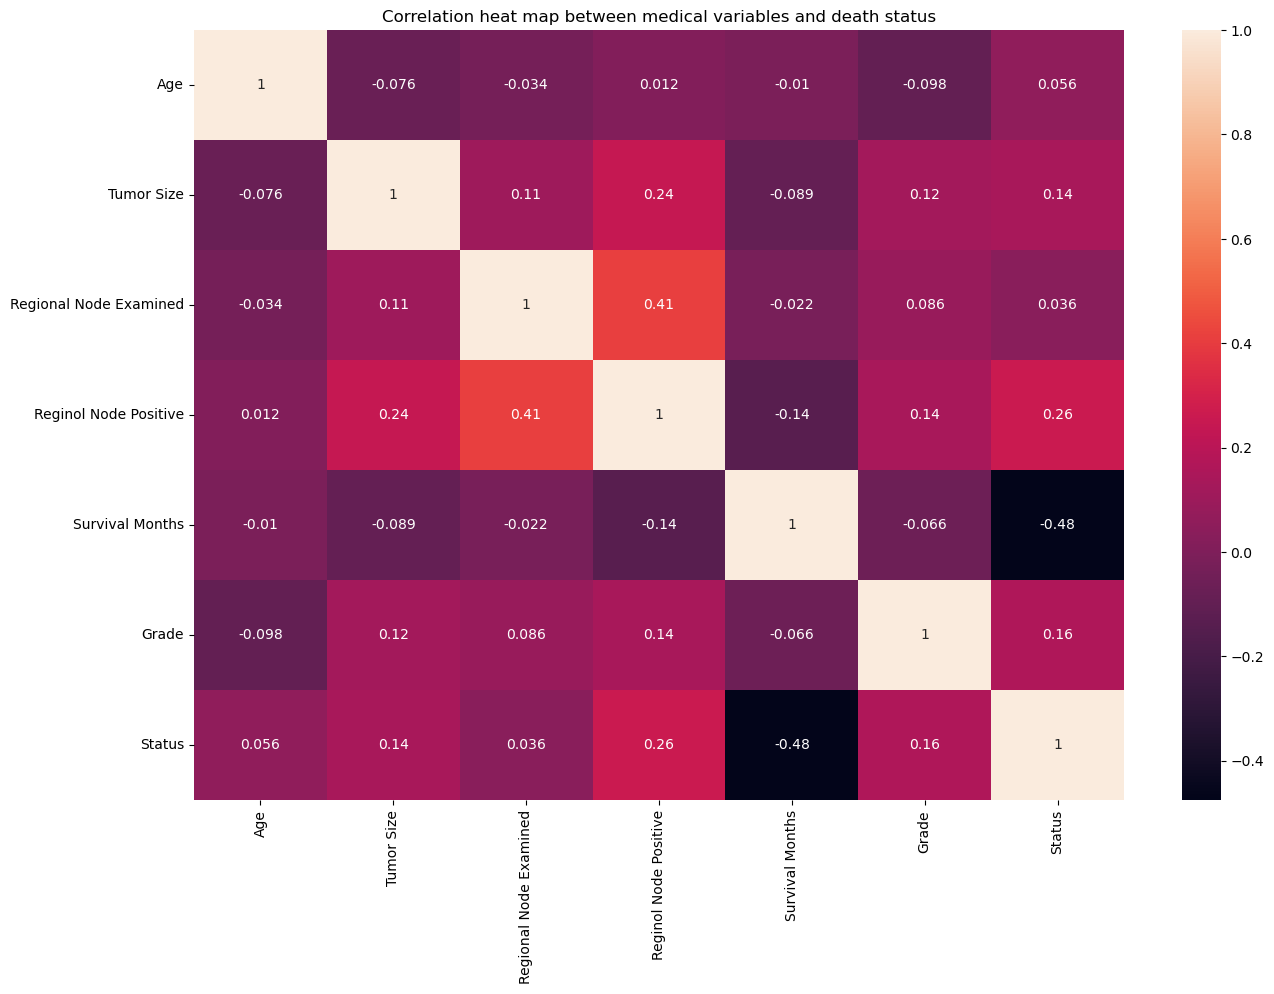

In [372]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_copy[new_column].corr(), annot = True)
plt.title('Correlation heat map between medical variables and death status')
plt.show()

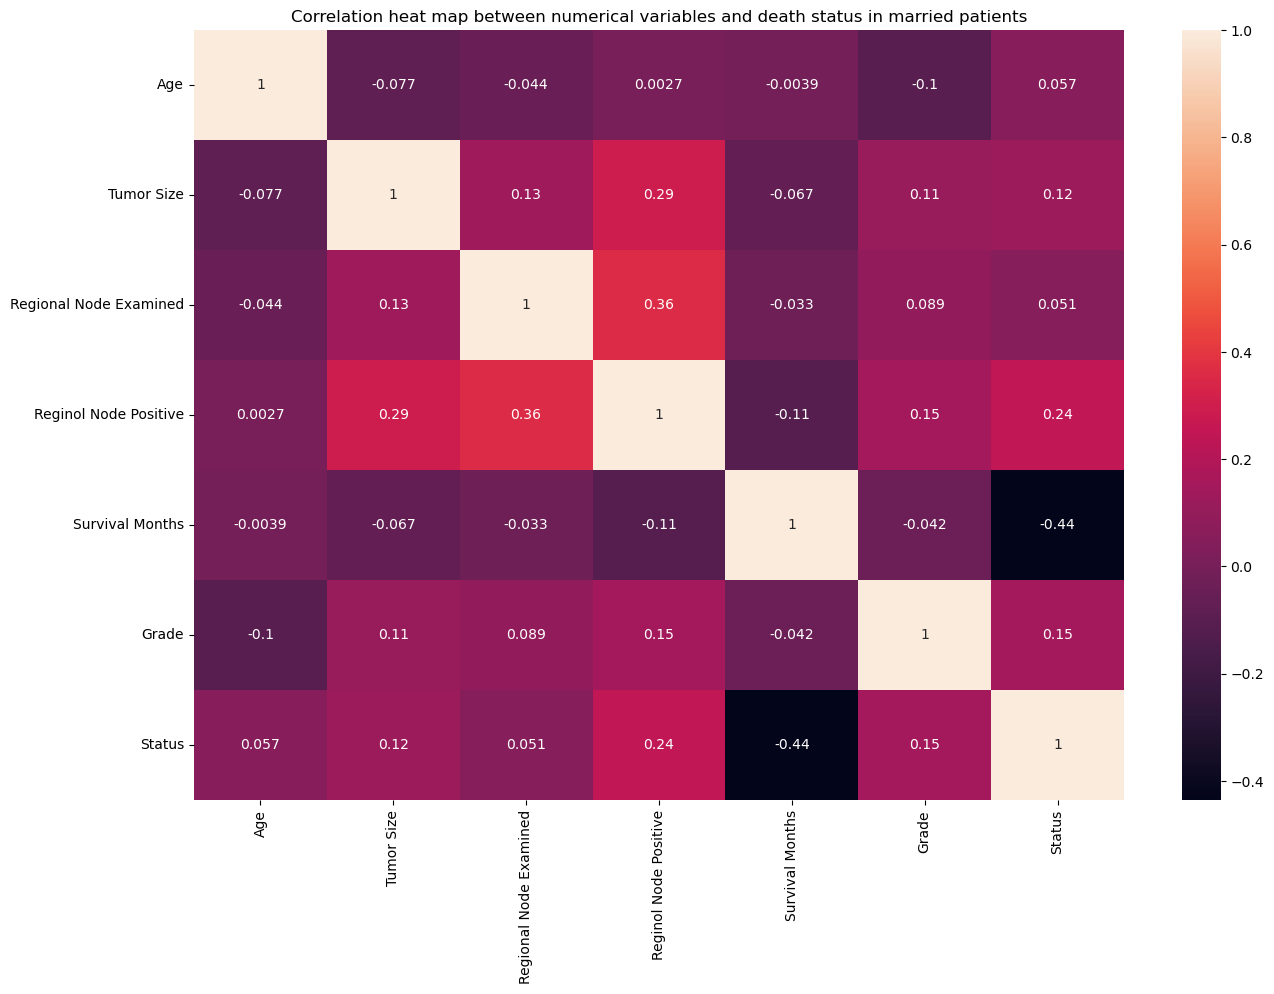

In [420]:
# create a dataframe with only married patients
married_patients = df_copy[df_copy['Marital Status'] == 'Married']

plt.figure(figsize = (15, 10))
sns.heatmap(data = married_patients[new_column].corr(), annot = True)
plt.title('Correlation heat map between numerical variables and death status in married patients')
plt.show()

there is a moderate negative correlation between the status and the survival months, meanig that as the survival months increases, the status decreases, and since 0 represent an alive patient and 1 represents a dead patient, that means the higher the survuval months , the patient is more likely to survive.

there is a weak positive correlation between the regional node positive and the death status, meaning that the bigger the regional node positive, the more likely the patient will die.

there is a weak positive correlation between the grade and the death status, and between the tumor size and death satus.

for the age and the regional node examined, the correlation is very close to zero there is a very weak correlation between those variables and the death status.

**the potential factors that can predict the death status among married pateints are: survival months, regional node positive, grade and tumor size**

In [373]:
categorical_variables = ['T Stage ', 'N Stage', '6th Stage', 'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status']

In [412]:
# drop the rows with the 0 value in the Progesterone Status because we don't know what 0 stands for

df_copy = df_copy[df_copy['Progesterone Status'] != '0']

In [375]:
df_copy.shape
# 5 rows were dropped

(4005, 16)

In [413]:
# encode the categorical variables to use a heatmap
for i in categorical_variables:
    df_copy[i] = label_encoder.fit_transform(df_copy[i])

### encoding
**T stage** 

T1: 0, T2: 1, T3: 2, T4: 5

**N stage**

N1: 0, N2: 1, N3: 2

**6th stage**

IIA: 0, IIB: 1, IIIA: 2, IIIB: 3, IIIC: 4

**differentiate**

moderate: 0, poor: 1, undefrentiated: 2, well: 3

**A stage**

distant: 0, regional 1

**Estrogen Status**

negative: 0, positive: 1

**Progesterone Status**

negative: 0, positive: 1

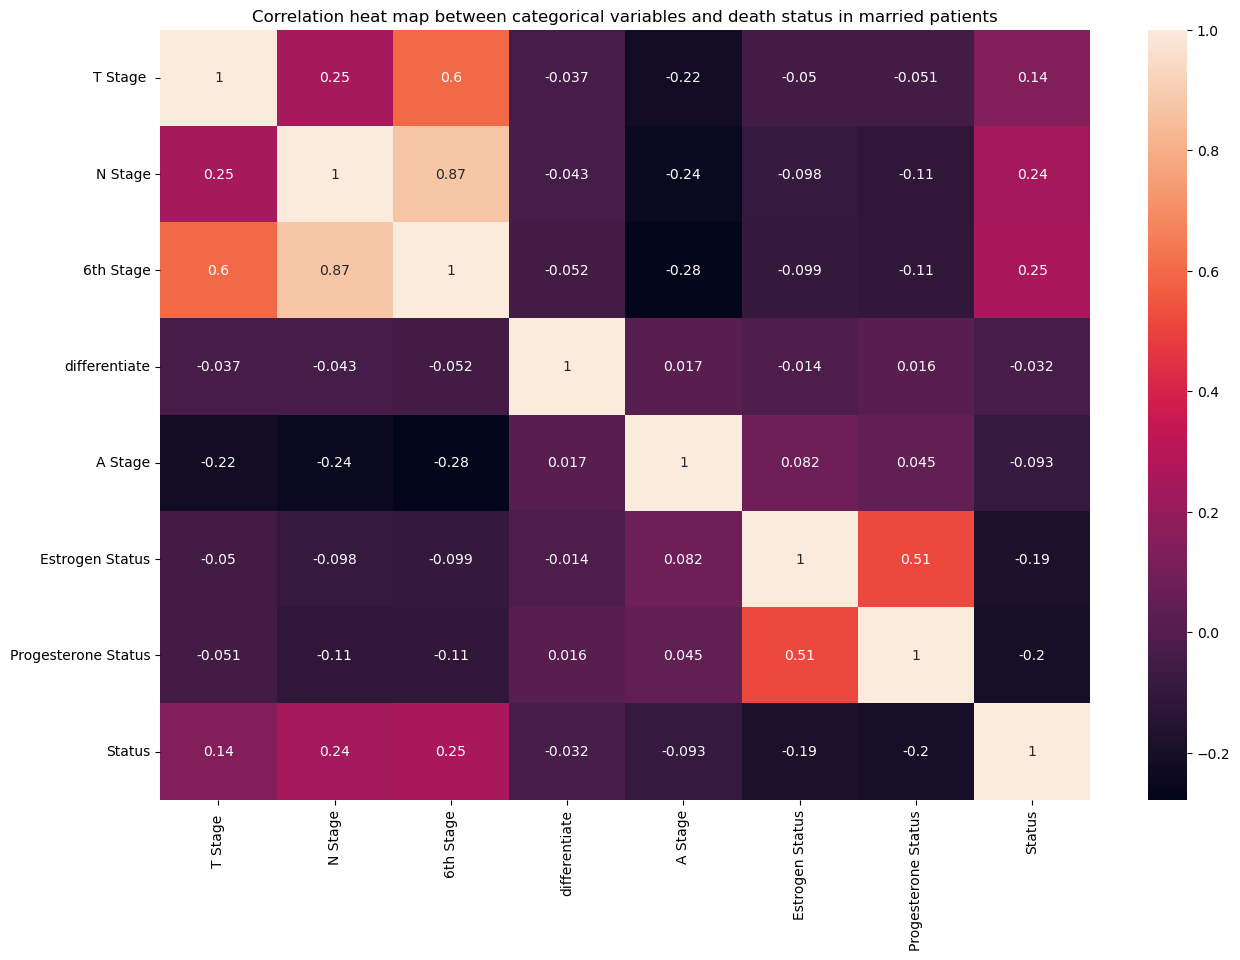

In [379]:
married_patients = df_copy[df_copy['Marital Status'] == 'Married']
target = ['T Stage ', 'N Stage', '6th Stage', 'differentiate', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']
plt.figure(figsize = (15, 10))
sns.heatmap(data = married_patients[target].corr(), annot = True)
plt.title('Correlation heat map between categorical variables and death status in married patients')
plt.show()

the higher the progesterone status, meaning if it's positive, the more likely the patient will survive (weak negative correlation) 

if the estrogen status is positive then the patient is more likely to survive

if the 6th stage, T satge and N stage is in the earlier stages, then the patient is more likely to survive

**the potential categorical factors that can predict death among married patients are: 6th stage, N stage, progesterone status, estrogen status and T stage --> however these correlations are weak so they might not play a big role**

###  Q4:
Solution:



In [349]:
# function that replaces the outlier

def replace_outliers(df, columns, replacement):
    for column in columns:
        df[column] = replacement[columns.index(column)]
    return df

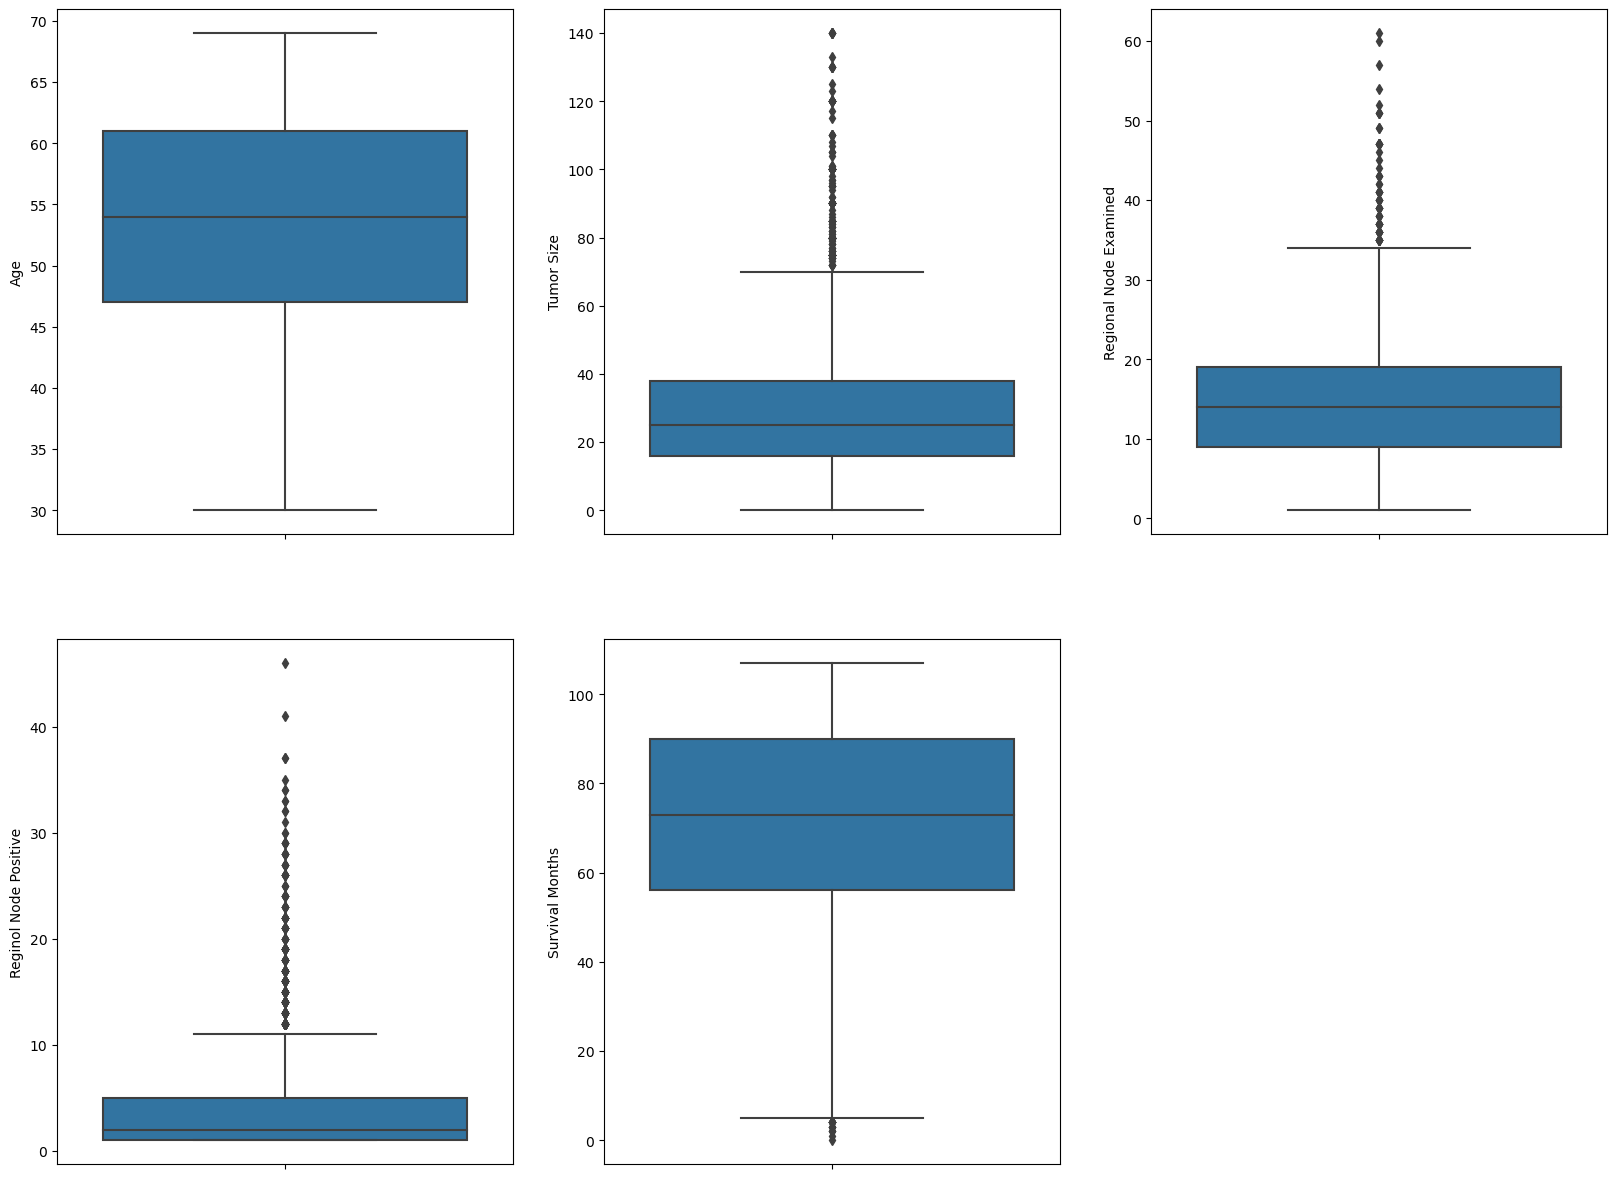

In [350]:
# create boxplots to visualize the outliers
plt.figure(figsize = (20, 15))

for i in range(len(numerical_values)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=numerical_values[i])


plt.show()

In [351]:
# use winsorization to get rid of the outliers

from scipy.stats.mstats import winsorize

tumor_size = winsorize(df['Tumor Size'],(0,0.07)) 
regional_node_examined = winsorize(df['Regional Node Examined'],(0,0.02)) 
regional_node_positive = winsorize(df['Reginol Node Positive'],(0,0.1)) 
survival_months = winsorize(df['Survival Months'],(0.01,0))

In [414]:
# replace the outliers with the winsorized variables
columns = ['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']
replacement = [tumor_size, regional_node_examined, regional_node_positive, survival_months]

new_df = replace_outliers(df_copy, columns, replacement)

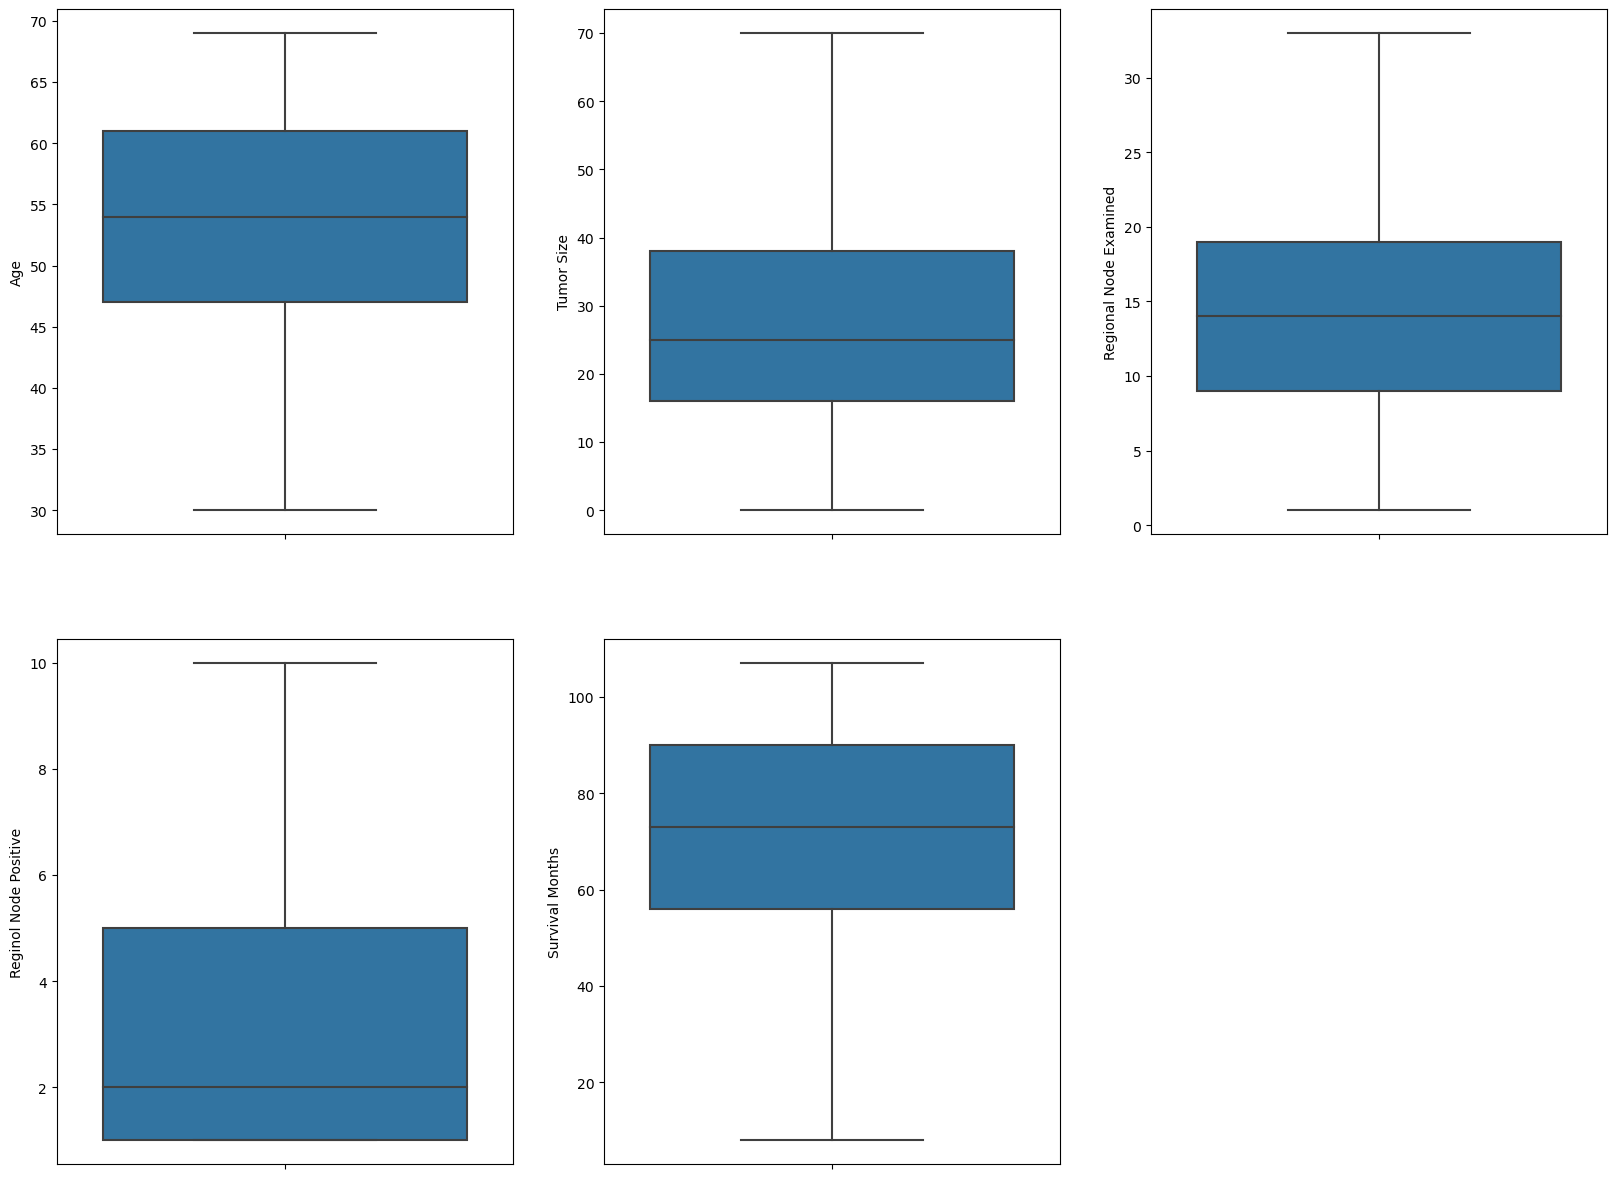

In [353]:
# visualize the data without to make sure the outliers are gone
plt.figure(figsize = (20, 15))

for i in range(len(numerical_values)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=new_df, y=numerical_values[i])


plt.show()

using the data of the descriptive statistics from question 1, we identified the existance of outliers in each of the numerical variables. but this time we used box plots to visualize them

instead of deleting the outliers and risking losing data, i decided to replace them using winsorization 

###  Q5:

considering the size of the data set compared to the number of missing values, we can drop the missing values instead of worrying about replacing them

and concidering the fact that this is a medical dataset, it is important to have the correct data to keep the integrity of the data set and not get misleading results

in total, 29 rows were dropped so this is nothing compared to the size of out dataset

###  Q6:

In [380]:
# locate the rows with zeros
rows_with_zero = df[(df == 0).any(axis=1)]

rows_with_zero

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
20,48,Other,Married,T2,N1,IIB,Well differentiated,1,Regional,30.0,Positive,Positive,15,2,0.0,Alive
73,66,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,0.0,Positive,Positive,15,1,98.0,Alive
74,67,White,Married,T2,N3,IIIC,Moderately differentiated,2,Regional,0.0,Positive,Negative,19,16,85.0,Alive
75,56,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,0.0,Positive,Positive,13,1,95.0,Alive
76,66,White,Single,T2,N2,IIIA,Moderately differentiated,2,Regional,0.0,Positive,Positive,11,4,79.0,Alive
77,42,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,0.0,Positive,Positive,7,1,106.0,Alive
78,51,White,Married,T2,N1,IIB,Well differentiated,1,Regional,0.0,Positive,Positive,9,1,81.0,Alive


in this case, the survival months can be equal to zero

but medically, the tumor size cannot be zero when the patient is already in grade 2 or stage 2. And also it doesn't make sense for the tumor size to be zero when the patients already have cancer.

considering that we got rid of the outliers, we can replace the zero values with the mean.

In [417]:
# get the mean of the tumor size and replace the zero values
tumor_size_mean = new_df['Tumor Size'].mean()
new_df.loc[new_df['Tumor Size'] == 0, 'Tumor Size'] = tumor_size_mean

# check that the rows with zeros are gone
zero_rows_tumor_size = new_df[new_df['Tumor Size'] == 0]
zero_rows_tumor_size

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status


In [419]:
new_df.shape

(4005, 16)

###  Q7:

In [425]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

rescaling = ['Age', 'Tumor Size', 'Survival Months']
new_df[rescaling] = scaler.fit_transform(new_df[rescaling]).round(2)

new_df[rescaling].head()

,Age,Tumor Size,Survival Months
0,0.97,0.04,0.53
1,0.51,0.49,0.55
2,0.72,0.90,0.68
11,0.41,0.84,0.85
12,0.90,0.49,0.48


The attributes age, tumor size and survival months are all continuous variables that span a wide range of values, so they will need rescalling to get more accurate results. Rescaling these variables can be useful for using algorithms such as k nearest neighbors. The other variables are categorical so they do not require rescalling

###  Q8 :
Solution


In [432]:
# ratio of the regional nodes that were examined and were positive
regional_node_ratio = round(new_df['Reginol Node Positive'] / new_df['Regional Node Examined'], 3)
new_df['Regional Node Ratio'] = regional_node_ratio
new_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Regional Node Ratio
0,0.97,White,Married,0,0,0,1,3,1,0.04,1,1,24,1,0.53,0,0.042
1,0.51,White,Married,1,1,2,0,2,1,0.49,1,1,14,5,0.55,0,0.357
2,0.72,White,Divorced,2,2,4,0,2,1,0.90,1,1,14,7,0.68,0,0.500
11,0.41,White,Married,2,0,2,1,3,1,0.84,0,0,11,3,0.85,0,0.273
12,0.90,White,Married,1,0,1,1,3,1,0.49,1,1,13,3,0.48,0,0.231


i added the ratio column because the number of nodes positive should be relative to the number of regional nodes that were examined.  simply counting the number of positive lymph nodes may not provide a complete picture, as it does not consider the total number of nodes examined, for example a patient with 2 positive nodes out of 3 examined does not have the same result as a person with 2 positive nodes out of 10.

the variables to exclude are: regional node examined, A stage and differentiate, because they have a weak correlation with the death status

# Assignment 2 - Machine Learning Models for Prediction
**(15 points total)**

 
* In **Assignment 1**, we have explored the data, cleaned up the data, modified features, and created new ones. 
* In **Assignment 2**, we will apply supervised machine learning models for classification and regression, evaluate its perofrmance, and identify the best models to solve the following problems: 

    * The **classification problem** is: given a train dataset of patients who survived or did not survive, build a model which can determine based on a given test dataset not containing the death event information information, if these patients in the test dataset survived or not. 

    * The **regression problem** is: predict the number of months that remains for the survival of the patient.



**Question 1. (Data preparation)**  _(2 points)_
* List the relevant features which you will use for classification and explain your answer (*a relevant feature is a feature that can have an impact on the chance of survival of the patient*).
* List the relevant features which you will use for regression and explain your answer (*a relevant feature is a feature that can have an impact on the prediction of the number of remaining survival months of the patient*).
* Divide both your datasets into a training set (70%) and a testing set (30%). All models will be trained and tested on the same splits.
    





###  Data Preparation & Spliting for the Classification Model

In [520]:
#imports
from sklearn.model_selection import train_test_split
#classification
# classifier 1: random forest
from sklearn.ensemble import RandomForestClassifier
# classifier 2: knn
from sklearn.neighbors import KNeighborsClassifier
# classifier 3: naive bayes
from sklearn.naive_bayes import GaussianNB

# evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve

#regression
# regressor 1: decision tree
from sklearn.tree import DecisionTreeRegressor
# regressor 2: linear regression
from sklearn.linear_model import LinearRegression

# evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [560]:
# pick features for the classification 
c_features = ['Age', 'Grade', 'Tumor Size', 'Estrogen Status',
            'Progesterone Status', 'Survival Months', 'Regional Node Ratio', 'Reginol Node Positive']

c_target = 'Status'

X_c = new_df[c_features]
y_c = new_df[c_target]

# split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c, test_size = 0.3, random_state = 127)

based on the analysis from part 1 as well as trial and error, i have decided on those features for my classification model

###  Data Preparation & Spliting for the Regression Model

In [566]:
# pick features for the regression
r_features = ['Age', 'Tumor Size', 'Status', 'Estrogen Status', '6th Stage', 'N Stage', 'Regional Node Ratio']
r_target = 'Survival Months'

X_r = new_df[r_features]
y_r = new_df[r_target]

# split the data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r,y_r, test_size = 0.3, random_state = 127)

based on the analysis from part 1 as well as trial and error, i have decided on those features for my regression model

**Question 2. (Classification models)**  _(3 points)_
* Train three different classification models of your choice using the training set. Explain the rationale behind selecting each of these three algorithms. You may refer to the following guidlines for model selection: 
    * Diagram from scikit-learn: https://scikit-learn.org/stable/tutorial/machine_learning_map/
    * Models comparison table: https://docs.google.com/spreadsheets/d/16i47Wmjpj8k-mFRk-NnXXU5tmSQz8h37YxluDV8Zy9U/edit#gid=0



In [570]:
## first classifier: random forest classifier 
classifier_1 = RandomForestClassifier(random_state= 127)
classifier_1.fit(X_train_c, y_train_c)
y_pred_c1 = classifier_1.predict(X_test_c)

## second classifier: k nearest neighbor
classifier_2 = KNeighborsClassifier(n_neighbors = 15)
classifier_2.fit(X_train_c, y_train_c)
y_pred_c2 = classifier_2.predict(X_test_c)

## third classifier: naive bayes
classifier_3 = GaussianNB()
classifier_3.fit(X_train_c, y_train_c)
y_pred_c3 = classifier_3.predict(X_test_c)

i picked these 3 algorithms because they are easy to implement, give high accuracy agerage and they gave me the best results compared to other models that i experimented with.

**Question 3. (Evaluation of classification models)**  _(3 points)_
* Evaluate the performance of your three classification models on the testing set using the following metrics: accuracy, area under the curve (AUC), precision, and recall.
* Based on the models evaluation results, what is the best model and why?




In [571]:
# classifier 1
accuracy_1 = accuracy_score(y_test_c, y_pred_c1)
precision_1 = precision_score(y_test_c, y_pred_c1)  
recall_1 = recall_score(y_test_c, y_pred_c1)
y_proba_1 = classifier_1.predict_proba(X_test_c)[:, 1]
auc_1 = roc_auc_score(y_test_c, y_proba_1)

# classifier 2
accuracy_2 = accuracy_score(y_test_c, y_pred_c2)
precision_2 = precision_score(y_test_c, y_pred_c2)  
recall_2 = recall_score(y_test_c, y_pred_c2) 
y_proba_2 = classifier_2.predict_proba(X_test_c)[:, 1]
auc_2 = roc_auc_score(y_test_c, y_proba_2)

# classifier 3
accuracy_3 = accuracy_score(y_test_c, y_pred_c3)
precision_3 = precision_score(y_test_c, y_pred_c3)  
recall_3 = recall_score(y_test_c, y_pred_c3) 
y_proba_3 = classifier_3.predict_proba(X_test_c)[:, 1]
auc_3 = roc_auc_score(y_test_c, y_proba_3)

print(f'Random forest classifier\nAccuracy: {accuracy_1} \nPrecision: {precision_1} \nRecall: {recall_1} \nAUC: {auc_1}\n --------------')
print(f'K Nearest Neighbor classifier\nAccuracy: {accuracy_2} \nPrecision: {precision_2} \nRecall: {recall_2} \nAUC: {auc_2}\n --------------')
print(f'Naive bayes classifier\nAccuracy: {accuracy_3} \nPrecision: {precision_3} \nRecall: {recall_3} \nAUC: {auc_3}')

Random forest classifier
Accuracy: 0.8993344425956739 
Precision: 0.8095238095238095 
Recall: 0.45698924731182794 
AUC: 0.8419032046397426
 --------------
K Nearest Neighbor classifier
Accuracy: 0.8618968386023295 
Precision: 0.8333333333333334 
Recall: 0.13440860215053763 
AUC: 0.7793185378037423
 --------------
Naive bayes classifier
Accuracy: 0.8336106489184693 
Precision: 0.4578313253012048 
Recall: 0.40860215053763443 
AUC: 0.8004138091609517


**the best model is the random forest classifier because it has the highest accuracy and auc score**

**Question 4. (Regression models)**  _(3 points)_
* Train two different regression models of your choice using the training set. Explain the rationale behind selecting each of these two algorithms. 



In [568]:
## first regressor: random forest regressor
regressor_1 = DecisionTreeRegressor(criterion = 'squared_error', random_state = 0, max_depth = 3, min_samples_leaf = 35)
regressor_1.fit(X_train_r, y_train_r)
y_pred_r1 = regressor_1.predict(X_test_r)

## second regressor: dicision tree regressor
regressor_2 = LinearRegression()
regressor_2.fit(X_train_r, y_train_r)
y_pred_r2 = regressor_2.predict(X_test_r)

i picked these models because they gave me the highest r squared score

**Question 5. (Evaluation of regression models)**  _(3 points)_
* Evaluate the performance of your two regression models on the testing set using the following metrics: mean absolute error,mean squared error, and R-square.
* Based on the models evaluation results, what is the best model and why?



In [569]:
# regressor 1
r_sq_1 = r2_score(y_test_r, y_pred_r1)
mae_1 = mean_absolute_error(y_test_r, y_pred_r1)
mse_1 = mean_squared_error(y_test_r, y_pred_r1)

# regressor 2
r_sq_2 = r2_score(y_test_r, y_pred_r2)
mae_2 = mean_absolute_error(y_test_r, y_pred_r2)
mse_2 = mean_squared_error(y_test_r, y_pred_r2)

print(f'Decision Tree Regressor \nMean absolute error: {mae_1} \nMean squared error: {mse_1} \nR suquared: {r_sq_1}\n --------------')
print(f'Liear Regressor \nMean absolute error: {mae_2} \nMean squared error: {mse_2} \nR suquared: {r_sq_2}')

Decision Tree Regressor 
Mean absolute error: 0.1648011612153267 
Mean squared error: 0.03990231845921786 
R suquared: 0.22845037134767665
 --------------
Liear Regressor 
Mean absolute error: 0.16600467173574368 
Mean squared error: 0.040260801747601334 
R suquared: 0.22151875286758704


**the best model is the decision tree regressor because it has a higher r squared and lower mean squared error**

**Question 6. (Possible improvements)** _(1 points)_
* How can you improve the accuracy of your classification model?
* How can you improve the accuracy of your regression model?

**to improve the accuracy of  both the classification and regression model we can**

- perform more feature engineering
- analyze the features further to select the relevant ones
- experiment with other models
- fine tune the parameters of the models